<a href="https://colab.research.google.com/github/shubhadeep357/ShadowFox/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime

# 1. Load the data
df = pd.read_csv('car.csv')

# 2. Create 'Age' feature
# We take the current year and subtract the year the car was made
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year']

# 3. Drop columns we don't need for the brain
# We drop 'Car_Name' because names don't help prediction as much as features do
final_dataset = df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
                    'Seller_Type', 'Transmission', 'Owner', 'Age']]

# 4. Convert text to numbers (One-Hot Encoding)
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

print("Preprocessing Complete. Dataset shape:", final_dataset.shape)
final_dataset.head()

Preprocessing Complete. Dataset shape: (301, 9)


,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,12,False,True,False,True
1,4.75,9.54,43000,0,13,True,False,False,True
2,7.25,9.85,6900,0,9,False,True,False,True
3,2.85,4.15,5200,0,15,False,True,False,True
4,4.60,6.87,42450,0,12,True,False,False,True


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# 1. Separate Features (X) and Target (y)
X = final_dataset.drop('Selling_Price', axis=1)
y = final_dataset['Selling_Price']

# 2. Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Random Forest
# n_estimators=100 means we are using 100 mini-trees
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# 4. Predict and evaluate
predictions = model.predict(X_test)

# Calculate Accuracy (R-squared score)
print(f"Model R-squared Score: {metrics.r2_score(y_test, predictions)*100:.2f}%")
print(f"Mean Absolute Error: ${metrics.mean_absolute_error(y_test, predictions):.2f}")

Model R-squared Score: 95.90%
Mean Absolute Error: $0.64


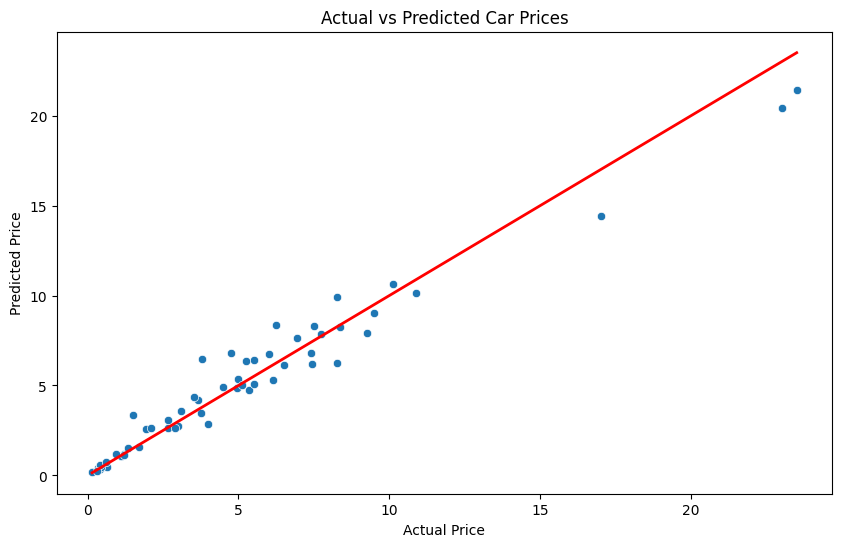

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

In [5]:
import pandas as pd

def predict_my_car_price(present_price, kms, age, owner, fuel_diesel, fuel_petrol, seller_individual, trans_manual):
    # Create a DataFrame with the same column names as the training data
    feature_names = ['Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']
    data_dict = {
        'Present_Price': [present_price],
        'Kms_Driven': [kms],
        'Owner': [owner],
        'Age': [age],
        'Fuel_Type_Diesel': [fuel_diesel],
        'Fuel_Type_Petrol': [fuel_petrol],
        'Seller_Type_Individual': [seller_individual],
        'Transmission_Manual': [trans_manual]
    }
    input_df = pd.DataFrame(data_dict, columns=feature_names)

    price = model.predict(input_df)
    return price[0]

# Example: A 5-year-old car, 10,000kms, Petrol, Manual, bought for 8.0 lakhs
my_car = predict_my_car_price(8.0, 10000, 5, 0, 0, 1, 0, 1)
print(f"The estimated selling price is: {my_car:.2f} Lakhs")

The estimated selling price is: 6.45 Lakhs
